# Introductory applied machine learning (INFR10069)

<font color='red'>
Q1:	45	  
Q2: 	40	  
Total:	85	  



# Assignment 2: Linear regression

## Marking Breakdown

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

## Mechanics

You should produce a Jupyter notebook in answer to this assignment.
**You need to submit this notebook electronically as described below.**

Place your notebook in a directory called `iamlans` and submit this directory using the submit command on a DICE machine. The format is:

`submit iaml 2 iamlans`

You can check the status of your submissions with the `show_submissions` command.

**Late submissions:** The policy stated in the School of Informatics MSc Degree Guide is that normally you will not be allowed to submit coursework late. See http://www.inf.ed.ac.uk/teaching/years/msc/courseguide10.html#exam for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you should NOT borrow actual text or code from other students. We ask that you provide a list of the people who you've had discussions with (if any).


## Important Instructions

1. In the following questions you are asked to run experiments using Python (version 2.7) and the following packages:
    * Numpy
    * Pandas
    * Scikit-learn
    * Matplotlib
    * Seaborn

2. Before you start make sure you have set up a vitual environment (or conda environment if you are working on your own machine) and the required packages installed. Instructions on how to set-up the working enviornment and install the required packages can be found in `01_Lab_1_Introduction`.

3. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers.

4. The .csv files that you will be using are located at `./datasets/` (the `datasets` directory is adjacent to this file).

5. **IMPORTANT:** Keep your answers brief and concise. Most questions can be answered with 2-3 lines of explanation (excluding coding questions).

## Imports

Execute the cell below to import all packages you will be using in the rest of the assignemnt.

In [2]:
from __future__ import print_function, division
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from sklearn.cross_validation import train_test_split, KFold, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
%matplotlib inline

/afs/inf.ed.ac.uk/user/s14/s1441759/virtualenvs/iaml_env/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Description of the dataset
This assignment is based on the automobile pricing dataset. Our goal will be to predict the price of automobiles based on various attributes. This data set consists of three types of entities: (a) the specification of an automobile in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuaries call this process ”symboling”. A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year. To save you time and to make the problem manageable with limited computational resources, we preprocessed the original dataset. We removed any instances that had one or more missing values and randomized the data set. The resulting representation is much more compact and can be used directly to perform our experiments.

## 1. Simple Linear Regression [50%]
We will begin by studying a simple Linear Regression model. Such a model will consider the relationship between a dependent (response) variable and only one independent (explanatory) variable. When applying machine learning in practice it can be prudent to start out simple in order to get a feeling for the dataset and for any potential difficulties that might warrant a more sophisticated model. In this Section we will consider one independent variable (i.e. feature) `engine-power` against the dependent variable (i.e. target) `price`.

### ========== Question 1.1 ==========
Load the dataset `train_auto_numeric.csv` into a pandas DataFrame called `auto_numeric`. Display the number of data points and attributes in the dataset.

In [3]:
data_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_numeric.csv')
auto_numeric = pd.read_csv(data_path, delimiter = ',')

<font color='red'>
You don't report the number of data points and attributes as requested!


### ========== Question 1.2 ==========
Display the first 8 instances of the dataset.

In [4]:
auto_numeric.head(8)

,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
0,164.0,99.8,176.6,66.2,54.3,8.85,3.19,3.40,10.0,102000.0,5500.0,24.0,30.0,40.52,57.68,13950.0
1,110.0,99.4,162.4,66.4,54.3,15.18,3.19,3.40,8.0,115000.0,5500.0,18.0,22.0,47.39,59.59,17450.0
2,158.0,105.8,192.7,71.4,51.6,15.18,3.94,2.80,8.5,70000.0,4400.0,28.0,30.0,0.85,3344.79,17710.0
3,106.0,86.6,158.7,67.7,55.9,13.74,3.13,3.50,7.8,140000.0,5600.0,32.0,20.0,44.74,68.97,23875.0
4,192.0,101.2,176.8,64.8,54.3,8.67,3.50,2.80,8.8,101000.0,5800.0,23.0,29.0,44.78,53.48,16430.0
5,194.0,110.0,190.9,71.4,58.7,8.67,3.78,3.90,22.5,101000.0,6000.0,47.0,53.0,1.80,1330.28,16925.0
6,188.0,101.2,176.8,64.8,54.3,26.58,3.31,3.19,9.0,121000.0,4250.0,21.0,28.0,7.19,377.06,20970.0
7,150.0,101.2,176.8,64.8,56.1,26.58,3.03,3.19,8.0,134000.0,4400.0,28.0,37.0,57.37,48.20,21105.0


<font color='red'>
Good!



### ========== Question 1.3 ==========
Display the summary statistics for the dataset.

In [5]:
auto_numeric.describe()

,normalized-losses,wheel-base,length,width,height,engine-size,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,mean-effective-pressure,torque,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,121.955975,98.559748,171.698113,65.729560,53.925157,14.056352,3.294528,3.219874,10.446855,98528.301887,5072.012579,27.113208,32.327044,46.180503,200.055031,11684.723270
std,39.434186,5.803361,12.656791,2.292021,2.410446,17.143568,0.296959,0.381833,4.414796,34123.715967,549.988239,7.848229,8.231998,28.780966,513.289289,6744.910579
min,65.000000,86.600000,141.100000,60.300000,49.400000,3.390000,2.540000,2.070000,7.000000,48000.000000,4150.000000,15.000000,18.000000,0.490000,19.400000,5118.000000
25%,93.000000,94.500000,163.400000,64.000000,52.000000,6.960000,3.050000,3.070000,8.600000,69000.000000,4800.000000,22.000000,26.500000,21.775000,34.140000,7372.000000
50%,110.000000,97.000000,171.700000,65.400000,54.100000,9.030000,3.270000,3.270000,9.000000,92000.000000,5100.000000,26.000000,32.000000,49.800000,55.900000,9233.000000
75%,145.000000,101.200000,177.800000,66.500000,55.600000,14.885000,3.580000,3.410000,9.400000,116000.000000,5450.000000,31.000000,37.000000,68.495000,119.990000,14719.500000
max,256.000000,115.600000,202.600000,71.700000,59.800000,174.160000,3.940000,4.170000,23.000000,200000.000000,6600.000000,49.000000,54.000000,99.850000,3912.870000,42056.000000


<font color='red'>
Good!



### ========== Question 1.4  ==========
Produce a scatter plot of `price` against `engine-power`. Label axes appropriately and include a title in your plot.

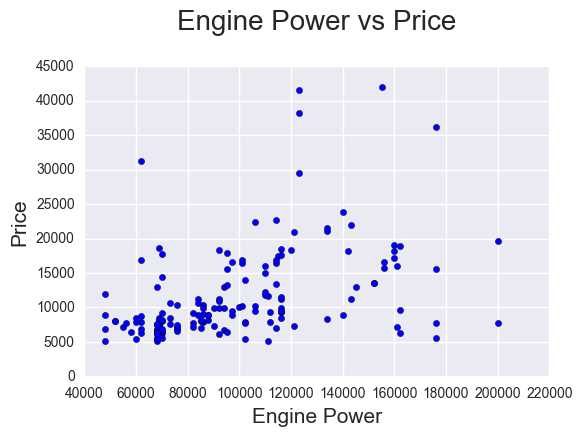

In [6]:
plt.scatter(auto_numeric['engine-power'],auto_numeric['price'])
plt.xlabel('Engine Power', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.title('Engine Power vs Price\n', fontsize=20)
plt.show()

<font color='red'>
Good!



### ========== Question 1.5  ==========
Do you think that engine-power alone is sufficient for predicting the price? Can you make any other observations on the data from the above plot? Please explain your answer in 2-3 sentences. 

*Your answer goes here*

The scatter plot shows a weak linear relationship between the two variables. The majority of points lie in the first interval on the graph, which corresponds to the 5000 - 10000 price range. This shows that a high value for the `engine-power` variable does not imply a high price range. By using just this variable to estimate the price, the points situated in the high end of the `engine-power` spectrum would be misestimated. Thus, one can conclude that `engine-power` alone is not sufficient to predict the price of a car.

<font color='red'>
Good!



### ========== Question 1.6  ==========
Visualise the distribution of the car prices. Choose a sensible value for the number of bins in the histogram. Again, label axes appropriately and include a title in your plot.

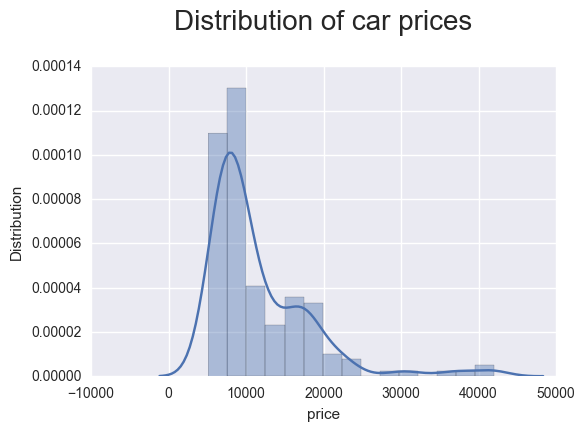

In [7]:
g = sns.distplot(auto_numeric['price'], bins=15)
g.set_ylabel('Distribution')
plt.title('Distribution of car prices\n', fontsize=20)
plt.show()

<font color='red'>
Good!



### ========== Question 1.7  ==========
How would you preprocess it to improve the performance of linear regression? Don’t do it at this stage, but instead in one sentence explain why you would do what you suggested.

*Your answer goes here*

I would attempt to normalize the data by applying a transformation function(for example log(x)).


<font color='red'>
Good, but you don't explain why.



### ========== Question 1.8  ==========
Now we want to build a simple linear regression model. First we need to define our input and target variables. Store the values of the attribute `engine-power` in a vector `X` and the values of our target variable `price` in a vector `y`.

In [8]:
X = auto_numeric['engine-power'].as_matrix()
y = auto_numeric['price'].as_matrix()

<font color='red'>
Good!



### ========== Question 1.9 ==========
For technical reasons, we need to convert `X` into a 2D array, otherwise we will receive an error when trying to use it for building models. Perform this transformation and confirm that the shape of the resulting array is (`n`,1) where `n` is the number of instances in the dataset. 

In [9]:
X = np.reshape(X, (X.size,1))
X.shape

(159, 1)

<font color='red'>
Good!



### ========== Question 1.10  ==========
Now we want to use Hold-out validation to split the dataset into training and testing subsets. Use 80% of the data for training and the remaining 20% for testing. Store your data into matrices `X_train`, `X_test`, `y_train`, `y_test`.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=0)

<font color='red'>
Good!



### ========== Question 1.11  ==========
By using Scikit-learn's [`LinearRegression`](http://scikit-learn.org/0.17/modules/generated/sklearn.linear_model.LinearRegression.html) fit a model to the training data. When initialising the model, set the `normalize` parameter to `True` and use default settings for the other parameters.

In [11]:
lm = LinearRegression(normalize=True)
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

<font color='red'>
Good!



### ========== Question 1.12  ==========
By looking into the attributes of your model, write down an equation for predicting the price of a car given the engine-power.

In [38]:
def pred_y(x):
    m = lm.coef_
    c = lm.intercept_
    y_pred = m*x + c
    return y_pred

print('y =', lm.coef_[0],'* x + ', lm.intercept_)

y = 0.0898838874387 * x +  2823.1218911


<font color='red'>
Good!



### ========== Question 1.13  ==========
What happens to the price as one more unit of engine-power is added? By examining the magnitude of the regression coefficient is it possible to tell whether or not engine-power is an important influential variable on price? Explain your answer in 1-2 sentences.

*Your answer goes here*

By increasing the engine-power by one unit, the predicted price will increase by the magnitude of the regression coefficient(m = 0.0899). The low magnitude coefficient of the regression shows that `engine-power` is not an influential variable on the price, increasing the engine-power by a unit producing a very small increase in the price.
<br/>The code below shows the increase for an engine-power value of 10000.



In [13]:
print('Original engine-power predicted price:',pred_y(10000)[0])
print('Increased engine-power predicted price:',pred_y(10001)[0])
print('Percentage of increase:', (pred_y(10001)[0] - pred_y(10000)[0]) * 100/pred_y(10000)[0])

Original engine-power predicted price: 3721.96076549
Increased engine-power predicted price: 3722.05064938
Percentage of increase: 0.00241496063775


<font color='red'>
Correct on the first point.

However, the value of the coefficient *can't* tell us how influential the related variable is because the units used for the variable are arbritary. For example, conisder a "height" variable - if height is measured in m, the learned coefficient will be 100 times higher than if height was measured in cm. So the magnitude of the coefficient is meaningless.


### ========== Question 1.14  ==========
Produce a scatter plot similar to the one in Question 1.4 but use training data only this time. Add the regression line to the plot and show the predictions on the training set by using a different marker. Label axes appropriately and add a title to the graph. 

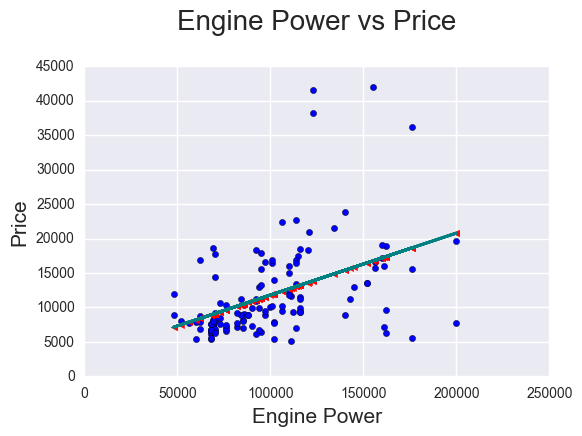

In [14]:
plt.scatter(X_train,y_train)
plt.xlabel('Engine Power', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.title('Engine Power vs Price\n', fontsize=20)
# Here I am using my own function created earlier to predict the price
# Using lm.predict would yield the same result 
y_pred_train = pred_y(X_train)
plt.scatter(X_train, y_pred_train, marker='<', color="red")
plt.plot(X_train, y_pred_train, color='teal',
          linewidth=2)
plt.show()

<font color='red'>
Good!



### ========== Question 1.15  ==========
So far we have used Hold-out validation. Can you think of a disadvantage of using this method, especially when dealing with small datasets?

*Your answer goes here*

In small sample sizes like the one in our problem, using Hold-out validation weakens the regressor. The regressor need as much data as possible to be trained on and by stripping away 20% of the data with Hold-out validation the accuracy of the regressor will surely be affected.

<font color='red'>
True, but the even bigger problem is that our testing set would be very small, and so likely not representative of the overall distribution of our data.


### ========== Question 1.16  ==========
Now we want to use [`KFold`](http://scikit-learn.org/0.17/modules/generated/sklearn.cross_validation.KFold.html) cross-validation to evaluate the performance of the regression model. Famliriase yourself with the method and make sure you understand the differences between Hold-out and K-fold cross-validation. By using Scikit-learn's `K-fold` class construct a 5-fold cross-validation iterator for the `auto_numeric` dataset. Set the `shuffle` parameter to `True` and `random_state` to `0`. 

In [15]:
kf = KFold(n=X.shape[0], n_folds=5, shuffle=True, random_state=0)

<font color='red'>
Good!



### ========== Question 1.17  ==========
By making use of the iterator you constructed in the previous question, loop through the 5 folds and display the mean value of the `price` variable for the training instances only in each fold.

In [16]:
for i, (train_index, test_index) in enumerate(kf):
    print('Fold', i+1, 'price mean:', np.mean(y[train_index]))

Fold 1 price mean: 11853.2677165
Fold 2 price mean: 11635.976378
Fold 3 price mean: 11689.8740157
Fold 4 price mean: 11709.8267717
Fold 5 price mean: 11535.84375


<font color='red'>
Good!



### ========== Question 1.18  ==========
Now initialise a new `LinearRegression` model and fit it by making use of the cross-validation iterator, the `X` and `y` arrays defined above and the [`cross_val_predict`](http://scikit-learn.org/0.17/modules/generated/sklearn.cross_validation.cross_val_predict.html) function. Display the shape of your prediction and confirm it has the same dimensionality as your `y` vector.

In [17]:
new_lm = LinearRegression(normalize=True)
prediction = cross_val_predict(new_lm, X, y, cv=kf)
print('Dimensionality of the prediction is:', prediction.shape)
print('Dimensionality of the test vector is:', y.shape)

Dimensionality of the prediction is: (159,)
Dimensionality of the test vector is: (159,)


<font color='red'>
Good!



### ========== Question 1.19  ==========
Report the Coefficient of Determination (R^2), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) and Correlation Coefficient (CC) from the simple linear regression model you build in Question 1.18. *Hint: RMSE is the square root of the Mean Squared Error (MSE). For CC you might find numpy's [`corrcoef`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.corrcoef.html) function useful.* 

In [18]:
print('Coefficient of Determination:', r2_score(y,prediction))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y,prediction)))
print('Mean Absolute Error:', mean_absolute_error(y,prediction))
print('Correlation Coefficient:', np.corrcoef(y,prediction)[0][1])

Coefficient of Determination: 0.173005270976
Root Mean Squared Error: 6114.45211862
Mean Absolute Error: 3987.95779619
Correlation Coefficient: 0.417122199043


<font color='red'>
Good!



### ========== Question 1.20  ==========
What do the above metrics intend to measure? Relate the values of CC, MAE and RMSE to the observations you made in Question 1.5. Explain your answer in 1-2 short paragraphs.

*Your answer goes here*

The metrics above are intended for conducting an analysis on our regressor. The Coefficient of Determination value shows a weak relationship between our test set and prediction. A percentage of 17% of the total variation in price can be explained by our linear relationship, whilst 83% remains unexplained. This means that the regression line determined by our model is incorrectly representing our data.
<br/><br/>
As noted in Question 1.5, the relationship between `engine-power` and `price` is a weak linear relationship. The large Root Mean Squared Error and Mean Absolute Error values further this observation, showing that our regressor often produces predictions that are at a large difference from the real values. Finally, the low positive Correlation Coefficient value shows once again that our relationship is weak.

<font color='red'>
Good!



### ========== Question 1.21 ==========
Show a histogram of the residuals of the linear regression model (i.e. true - predicted values). Label axes appropriately and add a title to your plot. Does the distribution of residuals look like what you expected?

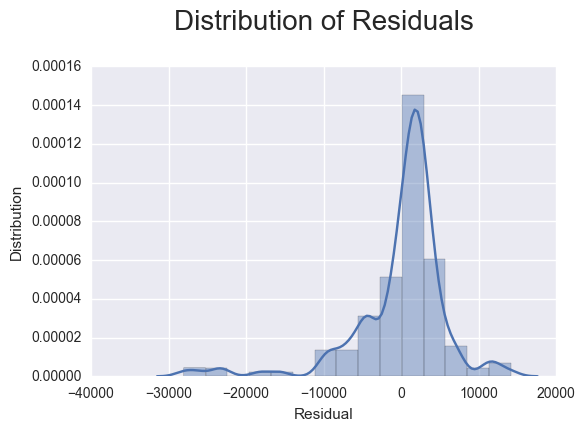

In [19]:
g = sns.distplot(prediction - y, bins=15)
g.set_xlabel('Residual')
g.set_ylabel('Distribution')
plt.title('Distribution of Residuals\n', fontsize=20)
plt.show()

*Your answer goes here*

The distribution is bell-shaped as expected, showing a normal distribution of the residuals.

<font color='red'>
Good!



### ========== Question 1.22 ==========
Load the new dataset `train_auto_base.csv` into a pandas DataFrame `auto_base`. Again by using the `engine-power` attribute as predictor and `price` as target variable build a LinearRegression model on this dataset. Report the R^2, RMSE, MAE and CC metrics for this model by making use of the K-fold CV iterator constructed in Question 1.16.

In [20]:
#Load new data
data_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_base.csv')
auto_base = pd.read_csv(data_path, delimiter = ',')
#New arrays to hold X and y
X_base = auto_base['engine-power'].as_matrix()
y_base = auto_base['price'].as_matrix()
#Reshape X_base
X_base = np.reshape(X_base, (X_base.size,1))
#New regression model
lm_base = LinearRegression(normalize=True)
#Cross Value Prediction
prediction_base = cross_val_predict(lm_base, X_base, y_base, cv=kf)
print('Coefficient of Determination:', r2_score(y_base, prediction_base))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_base, prediction_base)))
print('Mean Absolute Error:', mean_absolute_error(y_base, prediction_base))
print('Correlation Coefficient:', np.corrcoef(y_base, prediction_base)[0][1])

Coefficient of Determination: -0.00213595381121
Root Mean Squared Error: 6730.84360395
Mean Absolute Error: 4901.86096203
Correlation Coefficient: -0.0619144160589


<font color='red'>
Good!



### ========== Question 1.23 ==========
Show a scatter plot of true vs. predicted prices and another one of engine-power vs. predicted price. Use a single plot with two subplots. Label axes appropriately.

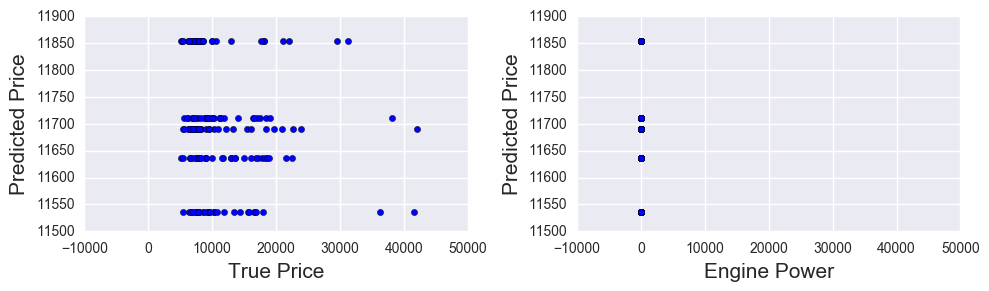

In [21]:
f, axes = plt.subplots(1, 2, sharex=True, figsize=(10,3))

axes[0].scatter(y_base, prediction_base)
axes[0].set_xlabel('True Price', fontsize=15)
axes[0].set_ylabel('Predicted Price', fontsize=15)

axes[1].scatter(X_base, prediction_base)
axes[1].set_xlabel('Engine Power', fontsize=15)
axes[1].set_ylabel('Predicted Price', fontsize=15)

plt.tight_layout()
plt.show()

<font color='red'>
Good!



### ========== Question 1.24 ==========
What is the simplest baseline model for the purposes of regression? Relate your answer to the regression model you have just built as part of this question. Can the predictions of this model be justified given the procedure you followed to train it?

*Your answer goes here*

The simplest baseline for regression is one that always predicts the average of all the `y`'s in the data. It seems like our regressor returns a range of averages and that the predicted price is just an average of the true prices. This is true because we have used a 5-fold cross validator.

<font color='red'>
Good!



### ========== Question 1.25 ==========
Why do you think this model performs so poorly? (*Hint: Justify your answer by displaying some statistics of the `auto_base` dataset.*)

In [22]:
# Your code goes here
auto_base.describe()

,engine-power,price
count,159.0,159.000000
mean,1.0,11684.723270
std,0.0,6744.910579
min,1.0,5118.000000
25%,1.0,7372.000000
50%,1.0,9233.000000
75%,1.0,14719.500000
max,1.0,42056.000000


*Your answer goes here*

Our model performed poorly because there is actually no linear relationship between `engine-power` and `price` as can be seen from the table: there is no standard deviation for `engine-power` whilst `price` has a standard deviation of 6744. 

<font color='red'>
Good!



## 2. Multivariate Linear Regression [50%]
In this Section we will fit a Multivariate Linear Regression model (LinearRegression) to the dataset. In contrast to Part 1, we will now train a model with multiple explanatory variables and ascertain how they affect our ability to predict the retail price of a car. One of our foremost concerns will be to determine exactly which attributes to include in the model and which may be left out.

### ========== Question 2.1 ==========
Use the original dataset (`auto_numeric`) and a visualisation tool of your choice to examine whether or not any of the other attributes are particularly good at predicting the price. Can you find any? Do any attributes appear useless at predicting the price? Do any attributes exhibit significant correlations? As you answer these questions, list two attributes for each question but do not modify the dataset at this stage. Of the attributes you listed, which ones could you safely remove? Explain in 4-5 sentences. *Hint: you might find seaborn's [`pairplot`](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html) function useful for this question.*

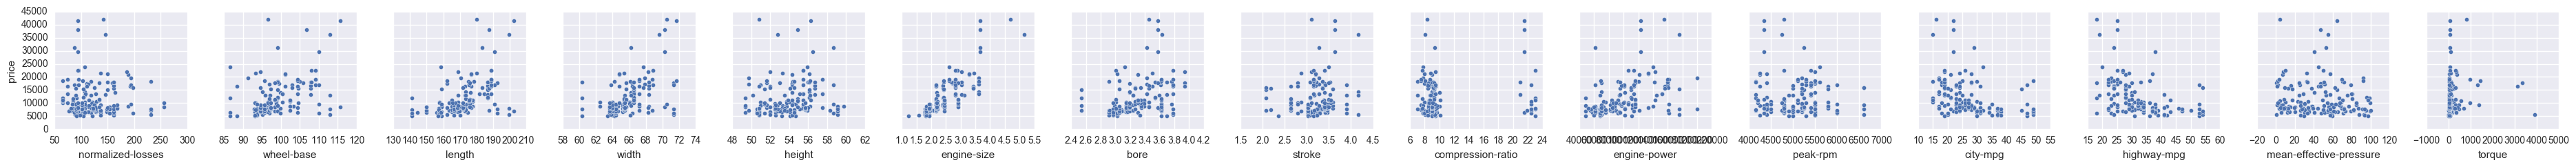

In [40]:
g = sns.pairplot(data=auto_numeric, x_vars=auto_numeric.drop('price', axis=1).columns, y_vars=['price'])
plt.tight_layout()
#Please double-click on the plots to enlarge

*Your answer goes here*

The attributes that appear to be slightly correlated to the price are `engine-size` and `engine-power`. There are attributes that could be considered useless at predicting the price such as `mean-effective-pressure`, `torque` and `compression-ratio`. It seems that regardless of the increase in `mean-effective-presssure` the majority of points lie in the first half of the price range, pointing to the fact that this attribute would not help us determine the price. The attributes `torque` and `compression-ratio` as well seem to have variating price for very low values exhibiting no correlation with price at all.

On the other hand, there are attributes that appear to be strongly correlated because of their category they are pulled from(measurements such as `length`,`width` and `height`).

I believe the `mean-effective-pressure`, `torque` and `compression-ratio` could be safely removed without affecting the predictor due to the reasons stated above.

<font color='red'>
Good!

You were also asked to report on correlations *between* attributes, which you didn't do. For example, length and width are highly correlated with each other, so keeping *both* of these is unlikely to help improve predictive power.

### ========== Question 2.2 ==========
We will now make a first attempt at building a Multivariate Linear Regression model using all numeric attributes. Initialise a `LinearRegression` model and predict the output by using 5-fold cross-validation and the `cross_val_predict` function.

In [24]:
mlr = LinearRegression(normalize=True)
X_mlr = auto_numeric.drop('price', axis=1)
y_mlr = auto_numeric['price']
mlr_kf = KFold(n=X_mlr.shape[0], n_folds=5, shuffle=True, random_state=0)
prediction = cross_val_predict(mlr, X_mlr, y_mlr, cv=kf)

<font color='red'>
Good!



### ========== Question 2.3 ==========
Display the Root Mean Squared Error (RMSE), Mean Absolute Error (MAE) and Correlation Coefficient (CC).

In [25]:
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_mlr, prediction)))
print('Mean Absolute Error:', mean_absolute_error(y_mlr, prediction))
print('Correlation Coefficient:', np.corrcoef(y_mlr, prediction)[0][1])

Root Mean Squared Error: 4819.80464283
Mean Absolute Error: 3050.34459963
Correlation Coefficient: 0.742560270537


<font color='red'>
Good!



### ========== Question 2.4 ==========
Comment on each metric display above in comparison to what you have obtained for the Simple Linear Regression model in Question 1.19.

*Your answer goes here*

It appears that our new model behaves in a much better way than the Simple Linear Regression model we used before. The metrics show smaller error magnitudes than before(4819 vs 6114 for RMSE and 3050 vs 3987 for MAE). The correlation coefficient is also much higher showing a strong positive linear relationship.

<font color='red'>
Good! You should explain *why* these values have improved too - the additional explanatory variables account for more of the variance in the price than engine power alone.



### ========== Question 2.5 ==========
Examine the histogram for the `engine-size` attribute. Choose a sensible value for the number of bins in the histogram. Label axes appropriately and include a title in your plot.

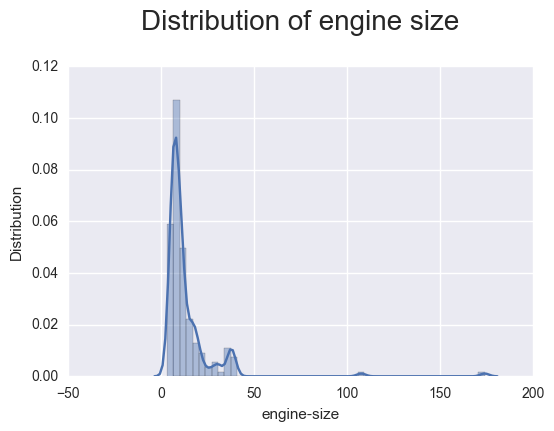

In [26]:
g = sns.distplot(auto_numeric['engine-size'])
g.set_ylabel('Distribution')
plt.title('Distribution of engine size\n', fontsize=20)
plt.show()

<font color='red'>
Good!



### ========== Question 2.6 ==========
Is the distribution expected to cause a problem for regression? Explain your answer in 2-3 sentences.

*Your answer goes here*

The distribution seems to be more biased in the lower side of the `engine-size` scale, low values being more common in the distribution. This will cause a problem for our regression as the model will be influenced by those low values. We want a wider distribution to our model so we should transform this data using a `log(x)` function.

<font color='red'>
The problem is really that the model will be disproportionatily influenced by the *high* values!


### ========== Question 2.7 ==========
Transform this attribute using an appropriate simple technique from the lectures. Plot the histogram of the transformed attribute.

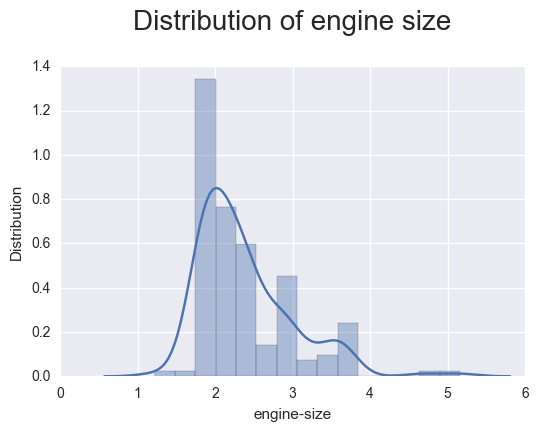

In [27]:
auto_numeric['engine-size'] = np.log(auto_numeric['engine-size'])
g = sns.distplot(auto_numeric['engine-size'])
g.set_ylabel('Distribution')
plt.title('Distribution of engine size\n', fontsize=20)
plt.show()

<font color='red'>
Good!



### ========== Question 2.8 ==========
Now re-build a Linear Regression model on the transformed dataset and report the R^2, RMSE, MAE and CC metrics.

In [28]:
mlr = LinearRegression(normalize=True)
X_mlr = auto_numeric.drop('price', axis=1)
y_mlr = auto_numeric['price']
mlr_kf = KFold(n=X_mlr.shape[0], n_folds=5, shuffle=True, random_state=0)
prediction = cross_val_predict(mlr, X_mlr, y_mlr, cv=kf)
print('Coefficient of Determination:', r2_score(y_mlr, prediction))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_mlr, prediction)))
print('Mean Absolute Error:', mean_absolute_error(y_mlr, prediction))
print('Correlation Coefficient:', np.corrcoef(y_mlr, prediction)[0][1])

Coefficient of Determination: 0.689612268029
Root Mean Squared Error: 3745.91959756
Mean Absolute Error: 2668.36429567
Correlation Coefficient: 0.831675321658


<font color='red'>
Good!



### ========== Question 2.9 ==========
How has the performance of your model changed? Explain your answer in 1-2 sentences.

*Your answer goes here*

We can observe from our metrics that our new model is making less mistakes with lower error rates. The correlation coefficient is now rather large, at 0.83 showing a strong relationship between our data.

<font color='red'>
Good, but again you should explain *why* these values have improved too - the transformation has weakened the distorting effect of the more extreme values in our dataset on the regression line. We have counteracted this by greatly reducing the range of values that the 'engine-size' variable can assume.



### ========== Question 2.10 ==========
So far we have performed regression with numeric attributes. We will now attempt to integrate nominal (categorical) attributes into our regression model. 
Load the dataset `train_auto_full.csv` into a pandas DataFrame called `auto_full`. Display the number of samples and attributes in the dataset. Also, display the first 20 instances of the dataset. *Hint: Execute the cell below to change the default for `max_columns` display option in pandas.*

In [29]:
pd.set_option('max_columns', 30)

In [30]:
data_path = os.path.join(os.getcwd(), 'datasets', 'train_auto_full.csv')
auto_full = pd.read_csv(data_path, delimiter = ',')
print('Number of samples: {}, number of attributes: {}'.format(auto_full.shape[0], auto_full.shape[1]))
auto_full.head(20)

Number of samples: 159, number of attributes: 27


,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,engine-power,peak-rpm,city-mpg,highway-mpg,symboling,mean-effective-pressure,torque,price
0,164.0,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,ohc,4,8.85,mpfi,3.19,3.40,10.00,102000.0,5500.0,24.0,30.0,2,40.52,57.68,13950.0
1,110.0,audi,gas,std,4,sedan,4wd,front,99.4,162.4,66.4,54.3,ohc,5,15.18,mpfi,3.19,3.40,8.00,115000.0,5500.0,18.0,22.0,2,47.39,59.59,17450.0
2,158.0,audi,gas,std,4,sedan,fwd,front,105.8,192.7,71.4,51.6,ohc,5,15.18,mpfi,3.94,2.80,8.50,70000.0,4400.0,28.0,30.0,1,0.85,3344.79,17710.0
3,106.0,audi,gas,turbo,4,sedan,fwd,front,86.6,158.7,67.7,55.9,ohc,5,13.74,mpfi,3.13,3.50,7.80,140000.0,5600.0,32.0,20.0,1,44.74,68.97,23875.0
4,192.0,bmw,gas,std,2,sedan,rwd,front,101.2,176.8,64.8,54.3,ohc,4,8.67,mpfi,3.50,2.80,8.80,101000.0,5800.0,23.0,29.0,2,44.78,53.48,16430.0
5,194.0,bmw,gas,std,4,sedan,rwd,front,110.0,190.9,71.4,58.7,ohc,4,8.67,mpfi,3.78,3.90,22.50,101000.0,6000.0,47.0,53.0,0,1.80,1330.28,16925.0
6,188.0,bmw,gas,std,2,sedan,rwd,front,101.2,176.8,64.8,54.3,ohc,6,26.58,mpfi,3.31,3.19,9.00,121000.0,4250.0,21.0,28.0,0,7.19,377.06,20970.0
7,150.0,bmw,gas,std,4,sedan,rwd,front,101.2,176.8,64.8,56.1,ohc,6,26.58,mpfi,3.03,3.19,8.00,134000.0,4400.0,28.0,37.0,0,57.37,48.20,21105.0
8,121.0,chevrolet,gas,std,2,hatchback,fwd,front,88.4,141.1,60.3,53.2,l,3,3.39,2bbl,3.03,3.03,9.50,48000.0,5300.0,47.0,53.0,2,59.33,25.08,5151.0
9,98.0,chevrolet,gas,std,2,hatchback,fwd,front,104.3,155.9,68.3,52.0,ohc,4,6.05,2bbl,3.31,3.47,7.80,70000.0,5000.0,34.0,34.0,1,51.55,36.35,6295.0


<font color='red'>
Good!



### ========== Question 2.11 ==========
This dataset contains a mixture of numeric and nominal attributes. Name the variables that you think are categorical. Why can we not use the nominal attributes in their current form for the purposes of regression? 

*Your answer goes here*

The variables that are categorical are: make, fuel-type, aspiration, body-style, drive-wheels, engine-location, engine-type, fuel-system. To help our regression model we will also consider the variables: num-of-doors, num-of-cylinders, symboling as categorical because they are discrete variables.

By using nominal values without transforming them would make fitting a regression model impossible, as the model can not understand strings but only discrete variables.

<font color='red'>
Good!



### ========== Question 2.12 ==========
Now we want to convert the categorical variables by using [One-Hot-Encoding](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder). Familiriase yourself with the class. One limitation with this module is that it can deal only with categorical attributes in integer format (remember that in our example we have attributes in string format). 

Copy the `auto_full` dataframe into a new dataframe `auto_full_edit` and transform the categorical variables by using [Label Encoding](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.LabelEncoder.html). Then transform again the categorical variables by using One-Hot-Encoding. Make sure you don't transform the continuous variables. *Hint: make appropriate use of the `categorical_features` parameter in [`OneHotEncoder`](http://scikit-learn.org/0.17/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder).*

Store the transformed attributes into a numpy array `X_enc` and display its dimensionality.  


In [31]:
categorical_vars = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
                    'engine-type', 'num-of-cylinders' , 'fuel-system', 'symboling']

auto_full_edit = auto_full.copy(deep=True)
for column in categorical_vars:
    le = LabelEncoder().fit(auto_full[column])
    auto_full_edit[column] = le.transform(auto_full[column])

categorical_vars_indices = []
features = auto_full.columns.tolist()
for var in categorical_vars:
    categorical_vars_indices.append(features.index(var))

ohe = OneHotEncoder(categorical_features = categorical_vars_indices)
X_enc = ohe.fit_transform(auto_full_edit.drop(['price'], axis=1))
print(X_enc.shape)

(159, 70)


<font color='red'>
Good!



### ========== Question 2.13 ==========
By using the transformed data train a multivariate linear regression model and by using 5-fold cross-validation report the R^2, RMSE, MAE and CC metrics.

In [37]:
mlr = LinearRegression(normalize=True)
y_enc = auto_full_edit['price']
mlr_kf = KFold(n=X_mlr.shape[0], n_folds=5, shuffle=True, random_state=0)
prediction = cross_val_predict(mlr, X_enc, y_enc, cv=kf)
print('Coefficient of Determination:', r2_score(y_enc, prediction))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_enc, prediction)))
print('Mean Absolute Error:', mean_absolute_error(y_enc, prediction))
print('Correlation Coefficient:', np.corrcoef(y_enc, prediction)[0][1])

Coefficient of Determination: 0.863834484295
Root Mean Squared Error: 2481.07415799
Mean Absolute Error: 1706.44373278
Correlation Coefficient: 0.9315173346


<font color='red'>
Good!



### ========== Question 2.14 ==========
How does this more complex model perform with respect to your best performing model from either question 2.3 or 2.8? List one advantage and one disadvantage of using the more complex model.

*Your answer goes here*

This more complex model is the best performing model that we have found so far. This model has the lowest error rates and a high R2 score and correlation coefficient. This shows that the model fits the data to a much better degree.

One advantage of One Hot Encoding is that the accuracy is much higher from using all the features available. But, on the other hand, the model would fail to respect the times and space constrains when working with larger sets of data. 

<font color='red'>
Good!



### ========== Question 2.15 ==========
Finally, experiment with tree-based regressors (e.g. [`DecisionTreeRegressor`](http://scikit-learn.org/0.17/modules/generated/sklearn.tree.DecisionTreeRegressor.html), [`RandomForestRegressor`](http://scikit-learn.org/0.17/modules/generated/sklearn.ensemble.RandomForestRegressor.html)) and report 5-fold cross-validation scores for R^2, RMSE, MAE and CC. You should still make use of the transformations applied in 2.8. Has your performance improved? Explain your answer in 1-2 sentences.

In [33]:
dtr = DecisionTreeRegressor()
prediction = cross_val_predict(estimator=dtr, X=X_enc, y=y_enc, cv=kf)
print('Decision Tree Regressor:')
print('Coefficient of Determination:', r2_score(y_enc, prediction))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_enc, prediction)))
print('Mean Absolute Error:', mean_absolute_error(y_enc, prediction))
print('Correlation Coefficient:', np.corrcoef(y_enc, prediction)[0][1])

print('\n')

rfr = RandomForestRegressor()
prediction = cross_val_predict(estimator=rfr, X=X_enc, y=y_enc, cv=kf)
print('Random Forest Regressor:')
print('Coefficient of Determination:', r2_score(y_enc, prediction))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_enc, prediction)))
print('Mean Absolute Error:', mean_absolute_error(y_enc, prediction))
print('Correlation Coefficient:', np.corrcoef(y_enc, prediction)[0][1])

Decision Tree Regressor:
Coefficient of Determination: 0.738868447477
Root Mean Squared Error: 3435.86311421
Mean Absolute Error: 2267.02515723
Correlation Coefficient: 0.870337883278


Random Forest Regressor:
Coefficient of Determination: 0.813124598851
Root Mean Squared Error: 2906.57977099
Mean Absolute Error: 1896.41257862
Correlation Coefficient: 0.903954658302


*Your answer goes here*

The performance hasn't improved in either of those cases, but the Random Forest Regressor seems to come close to our model. Even still, it falls behind our linear regression model. As opposed to classification where tree-based classification is better than linear model classifications, using tree-based regressors is not a viable idea as the tree-based model is more inaccurate and overall behaves worse.

<font color='red'>
Good!

However, tree-based regressors aren't 'unviable', they just happen to be worse than linear regression in this case. In general they may be better, particularly with non-linear data!

